Complete problems 5.3 and 5.4 from the end of chapter 5 in the text book.  You may complete these by hand and upload a scanned/photographed pdf or include the solutions in your Jupyter notebook and the pdf that you export for it.

5.3 Assume we want to filter the audio signal from a digital video disc (DVD) player as shown in Figure P5-3. The filtered audio signal drives, by way of a digital-to-analog (D/A) converter, a speaker. For the audio signal to have acceptable time synchronization with the video signal, video engineers have determined that the time delay of the filter must be no greater than 6×10−3 seconds. If the fs sample rate of the audio is 48 kHz, what is the maximum number of taps in the FIR filter that will satisfy the time delay restriction? (Assume a linear-phase FIR filter, and zerotime delay through the D/A converter.)

5.4 There are times when we want to build a lowpass filter and a highpass filter that are complementary. By “complementary” we mean that a highpass filter’s passband covers the frequency range defined by a lowpass filter’s stopband range. This idea is illustrated in Figure P5-4(a). An example of such filters is an audio system, shown in Figure P5-4(b), where the lowfrequency spectral components of an x(n) audio signal drive, by way of a digital-to-analog (D/A) converter, a low-frequency speaker (woofer). Likewise, the high-frequency spectral components of x(n) drive a highfrequency speaker (tweeter). Audio enthusiasts call Figure P5-4(b) a “crossover” network. Assuming that the lowpass filter is implemented with a 15-tap FIR filter whose hLow(k) coefficients are those in Figure P5-4 (c), the complementary highpass filter will have the coefficients shown in Figure P5-4(d). Highpass coefficients hHigh(k) are defined by 
Here is the problem: Draw a block diagram of a system that performs the process in P5-4(b) where only the hLow(k) lowpass FIR filter need be implemented. 

Revisit the DFT Basic Analysis assignment with the same sound recording and complete the following using the "fourth sound" in the file (recall that the indices are in the sample notebook code) which is a "C chord" for the middle-octave of the piano, consisting of these approximate frequencies:. 262, 330, and 392 Hz (for C, E, and G notes).  [In my original example, I "decimated" by 6 to go from a sampling frequency of 48 kHz which was a bit of overkill for the range to a sampling frequency of 8000 Hz, still more than needed.    You could decimate the original 48 kHz file by an integer rate larger than 6 if desired;  describe and justify your choice, whatever it is].

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys

from IPython.core.display import HTML
import scipy
from scipy import signal
from scipy.io import wavfile
from scipy.fft import fft
from scipy.signal import butter, lfilter, freqz
from scipy.signal import cheby1

In [2]:
def wavPlayer(filepath):
    """ displays HTML 5 player that may not be fully compatible with all browsers
    https://nbviewer.jupyter.org/gist/Carreau/5507501/the%20sound%20of%20hydrogen.ipynb
 """
    
    src = """
    <head>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
    <title>Simple Test</title>
    </head>    
    <body>
    <audio controls="controls" style="width:600px" >
      <source src="files/%s" type="audio/wav" />
      Your browser does not support the audio element.
    </audio>
    </body>
    """%(filepath)
    display(HTML(src))

In [3]:
soundFile = wave.open('./DSP_sound00.wav', 'r')

In [4]:
# Pull 16-bit amplitude time sequence from wav file.
# What range of numeric values would this precision give?
signal = soundFile.readframes(-1)
signal = np.frombuffer(signal, dtype='int16')
fs = soundFile.getframerate()

In [5]:
# Only mono sound supported with this example.
if soundFile.getnchannels() != 1:
    print("Only mono sound supported here but could be modified.")
    sys.exit(0)

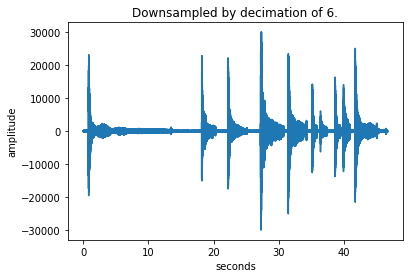

In [6]:
# Note frequencies:
# https://en.wikipedia.org/wiki/Piano_key_frequencies
# May use these to check which you think are played here.
# 48 kHz is overkill for sampling here, even for the major harmonics.
# Below is a simple example of downsampling via the simplest method, decimation.
# Decimation requires and even integer division of the two sample rates being converted.
# In this example, 48 kHz to 8 kHz is a decimation rate of 6.
# This takes advantage of some optimized Numpy methods for "re-shaping" in order to re-sample quickly.

dR = 6  #decimation rate

# Truncate last few samples if would not divide evenly.
integerLength_dR = int(len(signal)/dR) * dR
signal = signal[0:integerLength_dR]

# Change 1D array of N-length time sequence into an (N/6) x 6 2D matrix.
signalDS = signal.reshape(int(len(signal)/dR), dR)  

# Then take just the first column, resulting in every sixth sample.
signalDS = signalDS[:,0]

# Update sample rate for downsampled rate.
fs_ds = fs/dR

# Figure 1 -- amplitude of decimated time sequence, now with fs = 8 kHz.
plt.figure(1)
TimeDS = np.linspace(0, len(signalDS) / fs_ds, num=len(signalDS))
plt.title('Downsampled by decimation of 6.')
plt.ylabel('amplitude')
plt.xlabel('seconds')
plt.plot(TimeDS, signalDS)
plt.show()

# The plot should be unnoticeably different at this scale.

In [7]:
index41 =int(1300002/6)
index42 = int(index41 + 200004/6)# this would be a 200000/6 * ts time period 

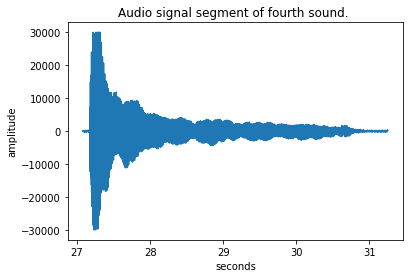

In [8]:
# Figure 2:  amplitude of forth sound'.
plt.figure(2)
plt.title("Audio signal segment of fourth sound. ")
Time1 = TimeDS[index41:index42]
signal1 = signalDS[index41:index42]
#TimeDS = np.linspace(0, len(signal1))

plt.ylabel('amplitude')
plt.xlabel('seconds')
plt.plot(Time1, signal1)
plt.show()

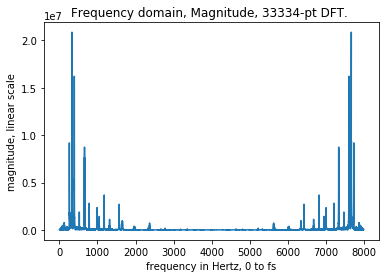

In [9]:
Xm = fft(signal1) # Take 200000/6-point DFT of signal clip
Freq = np.linspace(0, fs_ds, len(Xm))
# Figure 3:  Magnitude of DFT of audio clip, 0 to fs Hz.
plt.figure(3)
plt.title("Frequency domain, Magnitude, 33334-pt DFT. ")
plt.ylabel('magnitude, linear scale')
plt.xlabel('frequency in Hertz, 0 to fs')
plt.plot(Freq, abs(Xm))
plt.show()

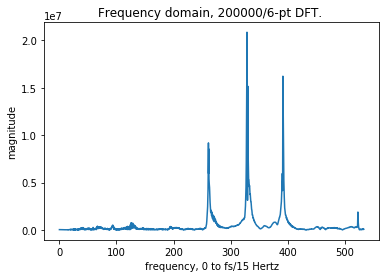

In [10]:
Xm = fft(signal1) # Take 200000/6-point DFT of signal clip
Freq = np.linspace(0, fs_ds, len(Xm))
# Figure 4:  Magnitude of DFT of audio clip, 0 to fs Hz.
zoom = 15 # zoom = 15 would just show non-redundant first half below folding freq
Xm_half = Xm[0:int((len(Xm)/zoom)-1)]
Freq = np.linspace(0, fs_ds/zoom, len(Xm_half))

plt.figure(4)
plt.title("Frequency domain, 200000/6-pt DFT. ")
plt.ylabel('magnitude')
plt.xlabel('frequency, 0 to fs/15 Hertz')
plt.plot(Freq, abs(Xm_half))
plt.show()

Design an FIR low-pass filter that attenuates E and G but keeps the C note near its original amplitude. Demonstrate using plots that your filter works and discuss attributes of it. 

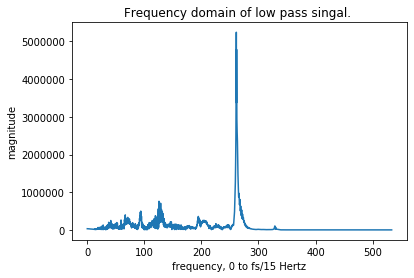

In [11]:
#Create an order 12 lowpass butterworth filter
b, a = scipy.signal.butter(12, 0.066, btype='low')
#Apply the filter to signal1. Use lfilter_zi to choose the initial condition of the filter
zi = scipy.signal.lfilter_zi(b, a)
z, _ = scipy.signal.lfilter(b, a, signal1, zi=zi*signal1[0])
#Use filtfilt to apply the filter
lfiltersignal1 = scipy.signal.filtfilt(b, a, signal1)
#Plot the filtered signal versions
lfilXm = fft(lfiltersignal1) # Take 200000/6-point DFT of signal clip
#lFreq = np.linspace(0, fs_ds, len(lfilXm))
# Figure 4:  Magnitude of DFT of audio clip, 0 to fs Hz.
zoom = 15 # zoom = 15 would just show non-redundant first half below folding freq
lfilXm_half = lfilXm[0:int((len(lfilXm)/zoom)-1)]
lFreq = np.linspace(0, fs_ds/zoom, len(lfilXm_half))

plt.figure(5)
plt.title("Frequency domain of low pass singal. ")
plt.ylabel('magnitude')
plt.xlabel('frequency, 0 to fs/15 Hertz')
plt.plot(lFreq, abs(lfilXm_half))
plt.show()

 I use Butterworth low-pass digital filter design. The majority of C chord is left after the filter applied. The E and G notes are filtered. 

Write a sound file (the original sample notebook also has a few lines that demonstrate this) and play it back as well as include it for your "C note" where the chord has been low-pass filtered.

In [12]:
# Write shorter clip to hear.  Player may not function in your Jupyter notebook implementation or browser but could be played with an external player if not.
wavfile.write('low-pass modified fourth sound.wav', int(fs_ds), lfiltersignal1.astype(np.int16))
wavPlayer('low-pass modified fourth sound.wav')

Can you improve your design with certain windowing or an increase in taps?

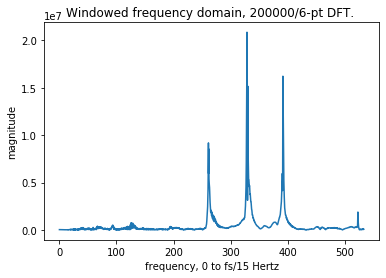

In [13]:
x = np.arange(len(signal1))
yhamm = np.hamming(len(signal1))
resultHamm = np.convolve(signal1, yhamm, mode='same') 
XmHamm = fft(resultHamm) # Take 200000/6-point DFT of signal clip
Freq = np.linspace(0, fs_ds, len(XmHamm))
# Figure 6:  Magnitude of DFT of hamming windowed-audio clip, 0 to fs Hz.
zoom = 15 # zoom = 15 would just show non-redundant first half below folding freq
XmHamm_half = Xm[0:int((len(XmHamm)/zoom)-1)]
Freq = np.linspace(0, fs_ds/zoom, len(XmHamm_half))

plt.figure(6)
plt.title("Windowed frequency domain, 200000/6-pt DFT. ")
plt.ylabel('magnitude')
plt.xlabel('frequency, 0 to fs/15 Hertz')
plt.plot(Freq, abs(XmHamm_half))
plt.show()

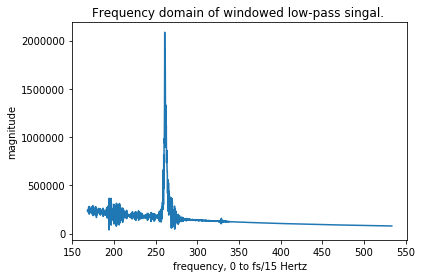

In [14]:
#Create an order 12 lowpass butterworth filter
b, a = scipy.signal.butter(12, 0.066, btype='low')
#Apply the filter to signal1. Use lfilter_zi to choose the initial condition of the filter
zi = scipy.signal.lfilter_zi(b, a)
z, _ = scipy.signal.lfilter(b, a, resultHamm, zi=zi*resultHamm[0])
#Use filtfilt to apply the filter
wlfiltersignal1 = scipy.signal.filtfilt(b, a, resultHamm)
#Plot the filtered signal versions
wlfilXm = fft(wlfiltersignal1) # Take 200000/6-point DFT of signal clip
#Freq = np.linspace(0, fs_ds, len(wlfilXm))
# Figure 7:  Magnitude of DFT of windowed low-pass audio clip, 0 to fs Hz.
zoom = 15 # zoom = 15 would just show non-redundant first half below folding freq
wlfilXm_half = wlfilXm[0:int((len(wlfilXm)/zoom)-1)]
wlFreq = np.linspace(0, fs_ds/zoom, len(wlfilXm_half))

plt.figure(7)
plt.title("Frequency domain of windowed low-pass singal. ")
plt.ylabel('magnitude')
plt.xlabel('frequency, 0 to fs/15 Hertz')
plt.plot(wlFreq[700:], abs(wlfilXm_half[700:]))
plt.show()

I applied hamming window to the signal before applying the low pass filter. The signal have slight improvement.

Create a high-pass filter that attenuates C and E but keeps the G note near its original amplitude and demonstrate this filter as well.

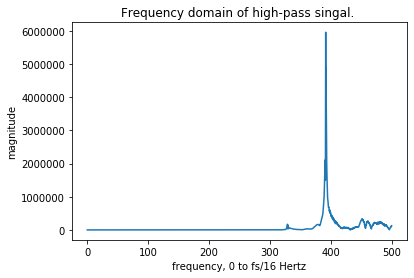

In [15]:
#Create an order 12 lowpass butterworth filter
b, a = scipy.signal.butter(12, 0.1, btype='high')
#Apply the filter to signal1. Use lfilter_zi to choose the initial condition of the filter
zi = scipy.signal.lfilter_zi(b, a)
z, _ = scipy.signal.lfilter(b, a, signal1, zi=zi*signal1[0])
#Use filtfilt to apply the filter
hfiltersignal1 = scipy.signal.filtfilt(b, a, signal1)
#Plot the filtered signal versions
hfilXm = fft(hfiltersignal1) # Take 200000/6-point DFT of signal clip
#hFreq = np.linspace(0, fs_ds, len(hfilXm))
# Figure 8:  Magnitude of DFT of high-pass audio clip, 0 to fs Hz.
zoom = 16 # zoom = 16 would just show non-redundant first half below folding freq
hfilXm_half = hfilXm[0:int((len(hfilXm)/zoom)-1)]
hFreq = np.linspace(0, fs_ds/zoom, len(hfilXm_half))

plt.figure(8)
plt.title("Frequency domain of high-pass singal. ")
plt.ylabel('magnitude')
plt.xlabel('frequency, 0 to fs/16 Hertz')
plt.plot(hFreq, abs(hfilXm_half))
plt.show()

Can you use the Parks-McLellan (Remez routine) method in SciPy to create a bandpass filter for E and also demonstrate?

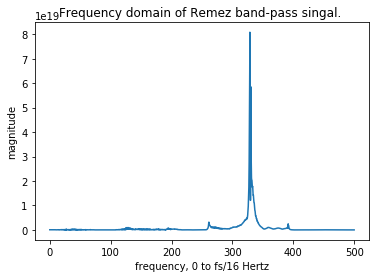

In [16]:
fs = 8000         # Sample rate, Hz
band = [310, 340]  # Desired pass band, Hz
trans_width = 10    # Width of transition from pass band to stop band, Hz
numtaps = 62        # Size of the FIR filter.
edges = [0, band[0] - trans_width, band[0], band[1], band[1] + trans_width, 0.5*fs]
taps = scipy.signal.remez(numtaps, edges, [0, 1, 0], Hz=fs)
zi = scipy.signal.lfilter_zi(taps, a)
z, _ = scipy.signal.lfilter(taps, a, signal1, zi=zi*signal1[0])
#Use filtfilt to apply the filter
bfiltersignal1 = scipy.signal.filtfilt(taps, a, signal1)
#Plot the filtered signal versions
bfilXm = fft(bfiltersignal1) # Take 200000/6-point DFT of signal clip
#bFreq = np.linspace(0, fs_ds, len(bfilXm))
# Figure 9:  Magnitude of DFT of band pass audio clip, 0 to fs Hz.
zoom = 16 # zoom = 40 would just show non-redundant first half below folding freq
bfilXm_half = bfilXm[0:int((len(bfilXm)/zoom)-1)]
bFreq = np.linspace(0, fs_ds/zoom, len(bfilXm_half))

plt.figure(9)
plt.title("Frequency domain of Remez band-pass singal. ")
plt.ylabel('magnitude')
plt.xlabel('frequency, 0 to fs/16 Hertz')
plt.plot(bFreq, abs(bfilXm_half))
plt.show()

revisit your low-pass filter for the C-note and complete a Chebyshev window FIR low-pass filter per the algorithm instructions in Appendix I in the textbook.  

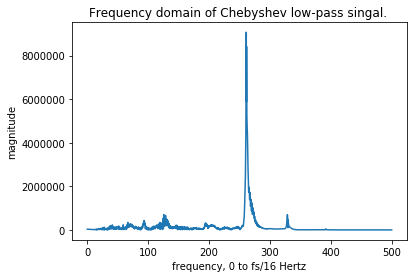

In [17]:
# Sampling parameters
fs = 8000  # Hz

# Desired filter parameters
order = 5
Apass = 0.7  # dB
fcut = 270    # Hz

# Normalized frequency argument for cheby1
wn = fcut / (0.5*fs)

b, a = cheby1(order, Apass, wn)

zi = scipy.signal.lfilter_zi(b, a)
z, _ = scipy.signal.lfilter(b, a, signal1, zi=zi*signal1[0])
#Use filtfilt to apply the filter
bfiltersignal1 = scipy.signal.filtfilt(b, a, signal1)
#Plot the filtered signal versions
bfilXm = fft(bfiltersignal1) # Take 200000/6-point DFT of signal clip
#bFreq = np.linspace(0, fs_ds, len(bfilXm))
# Figure 4:  Magnitude of DFT of audio clip, 0 to fs Hz.
zoom = 16 # zoom = 40 would just show non-redundant first half below folding freq
bfilXm_half = bfilXm[0:int((len(bfilXm)/zoom)-1)]
bFreq = np.linspace(0, fs_ds/zoom, len(bfilXm_half))

plt.figure(10)
plt.title("Frequency domain of Chebyshev low-pass singal. ")
plt.ylabel('magnitude')
plt.xlabel('frequency, 0 to fs/16 Hertz')
plt.plot(bFreq, abs(bfilXm_half))
plt.show()

Demonstrate that this functions and also compare it to a low-pass FIR filter for the same note designed using the SciPy Remez with similar number of taps.

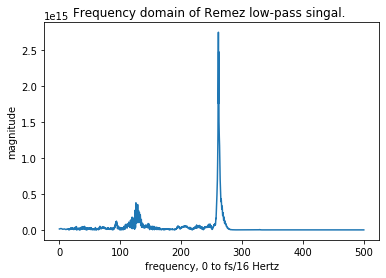

In [19]:
cutoff = 270    # Desired cutoff frequency, Hz
fs = 8000         # Sample rate, Hz
trans_width = 10    # Width of transition from pass band to stop band, Hz
numtaps = 150       # Size of the FIR filter.
taps = scipy.signal.remez(numtaps, [0, cutoff, cutoff + trans_width, 0.5*fs], [1, 0], Hz=fs)
zi = scipy.signal.lfilter_zi(taps, a)
z, _ = scipy.signal.lfilter(taps, a, signal1, zi=zi*signal1[0])
#Use filtfilt to apply the filter
bfiltersignal1 = scipy.signal.filtfilt(taps, a, signal1)
#Plot the filtered signal versions
bfilXm = fft(bfiltersignal1) # Take 200000/6-point DFT of signal clip
#bFreq = np.linspace(0, fs_ds, len(bfilXm))
# Figure 4:  Magnitude of DFT of audio clip, 0 to fs Hz.
zoom = 16 # zoom = 40 would just show non-redundant first half below folding freq
bfilXm_half = bfilXm[0:int((len(bfilXm)/zoom)-1)]
bFreq = np.linspace(0, fs_ds/zoom, len(bfilXm_half))

plt.figure(11)
plt.title("Frequency domain of Remez low-pass singal. ")
plt.ylabel('magnitude')
plt.xlabel('frequency, 0 to fs/16 Hertz')
plt.plot(bFreq, abs(bfilXm_half))
plt.show()

The chebyshev have roughly the same stopband sidelobe levels (same ripple level), near the main lobe, but that the Remez filter has the more desirable transition band roll-off(sharp main lope). 